In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from utils import (
    get_runs, get_generated_rooms, get_fitness_vars, get_fitness_vars_by_id, get_variable_properties_by_id,
    plot_for_each_level, vars_columns
)

In [3]:
runs = get_runs()
generated_rooms = get_generated_rooms()
fitness_vars = get_fitness_vars()

In [4]:
runs_and_generated_rooms = pd.merge(runs, generated_rooms, on='fitness_vars_id')
runs_and_generated_rooms = runs_and_generated_rooms.drop(columns=['id_y'])
runs_and_generated_rooms['difficulty_rounded'] = runs['difficulty'].round(2)

In [5]:
folder_path = './figs/generated_rooms_analysis/'

# Informações gerais

## Tempo para geração das salas

### Um plot por nível

In [6]:
quartis_por_nivel = runs_and_generated_rooms.groupby('level')['time_y'].describe()
print(quartis_por_nivel)

       count      mean       std       min       25%       50%       75%  \
level                                                                      
0      154.0  0.537053  0.178494  0.332085  0.400709  0.483219  0.632561   
1      116.0  0.527208  0.158621  0.331207  0.382843  0.516579  0.632431   
2       33.0  0.495864  0.161317  0.331543  0.366638  0.465820  0.549072   

            max  
level            
0      1.099426  
1      1.066101  
2      1.099182  


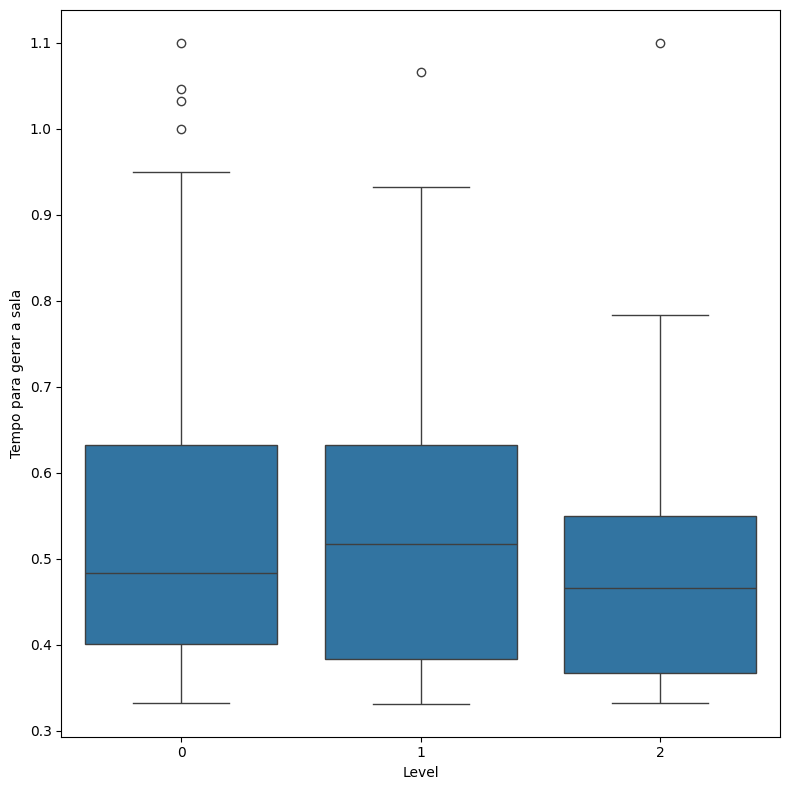

In [7]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='level', y='time_y', data=runs_and_generated_rooms, dodge=True)
plt.xlabel(f'Level')
plt.ylabel(f'Tempo para gerar a sala')
plt.tight_layout()

plt.savefig(f'{folder_path}/room_generation_time_per_level.png', dpi=96, bbox_inches='tight')

plt.show()

### Tudo em um plot

In [8]:
quartis_por_nivel = runs_and_generated_rooms['time_y'].describe()
print(quartis_por_nivel)

count    303.000000
mean       0.528798
std        0.169215
min        0.331207
25%        0.398132
50%        0.499481
75%        0.631897
max        1.099426
Name: time_y, dtype: float64


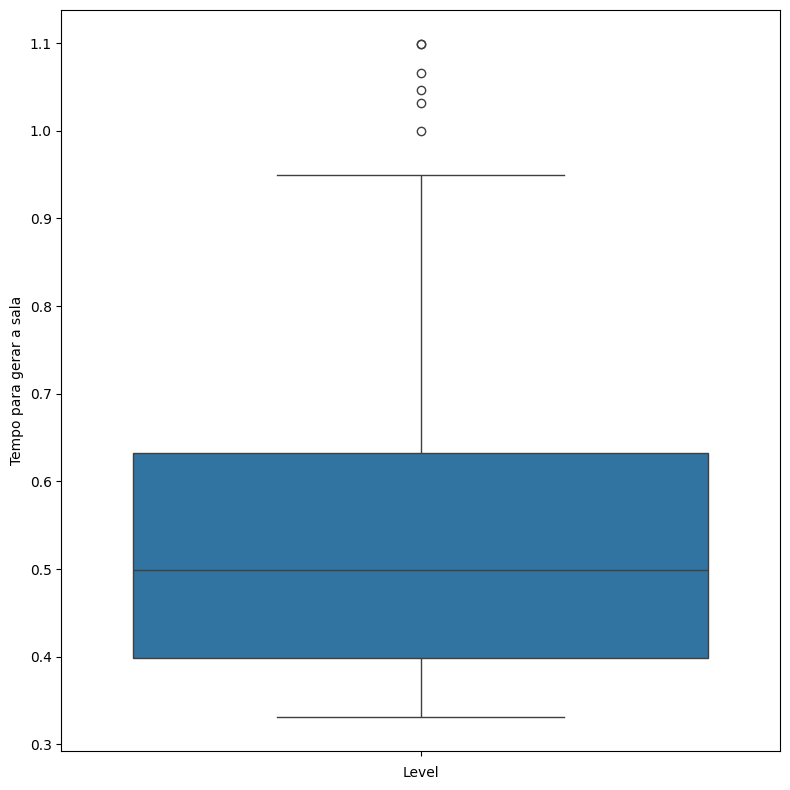

In [9]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=runs_and_generated_rooms['time_y'])
plt.xlabel(f'Level')
plt.ylabel(f'Tempo para gerar a sala')
plt.tight_layout()

plt.savefig(f'{folder_path}/room_generation_time.png', dpi=96, bbox_inches='tight')
plt.show()

## Quantidade de iterações para geração das salas

### Histograma

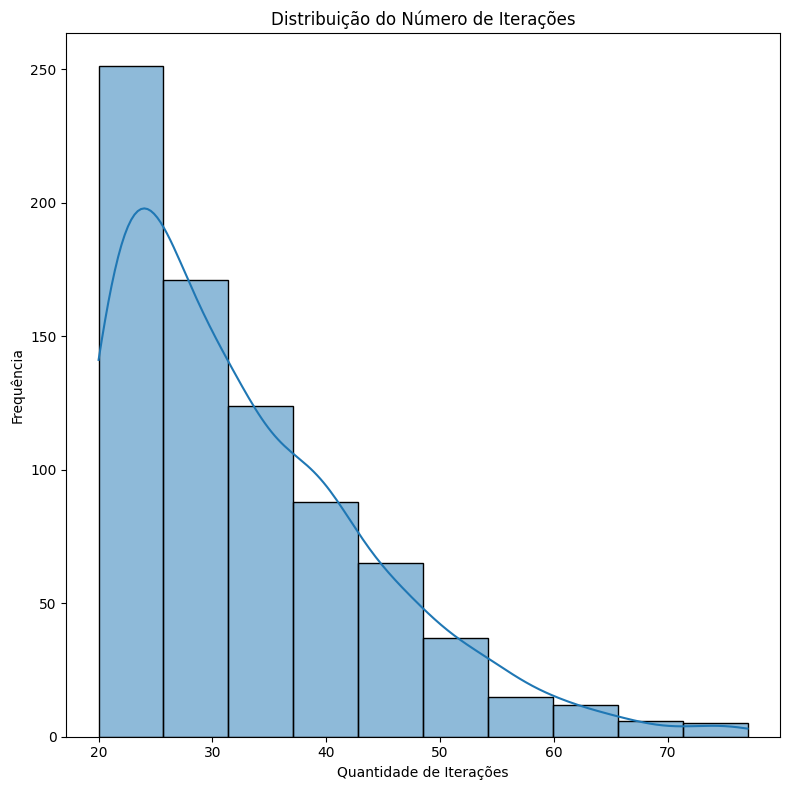

In [10]:
plt.figure(figsize=(8, 8))
sns.histplot(generated_rooms['iterations'], bins=10, kde=True)
plt.xlabel('Quantidade de Iterações')
plt.ylabel('Frequência')
plt.title('Distribuição do Número de Iterações')
plt.tight_layout()

plt.savefig(f'{folder_path}/iterations.png', dpi=96, bbox_inches='tight')
plt.show()

### Boxplot

#### Um plot por nível

In [11]:
quartis_por_nivel = runs_and_generated_rooms.groupby('level')['iterations'].describe()
print(quartis_por_nivel)

       count       mean        std   min   25%   50%   75%   max
level                                                           
0      154.0  32.181818  10.721339  20.0  24.0  29.0  38.0  66.0
1      116.0  31.663793   9.517895  20.0  23.0  31.0  38.0  64.0
2       33.0  29.787879   9.675218  20.0  22.0  28.0  33.0  66.0


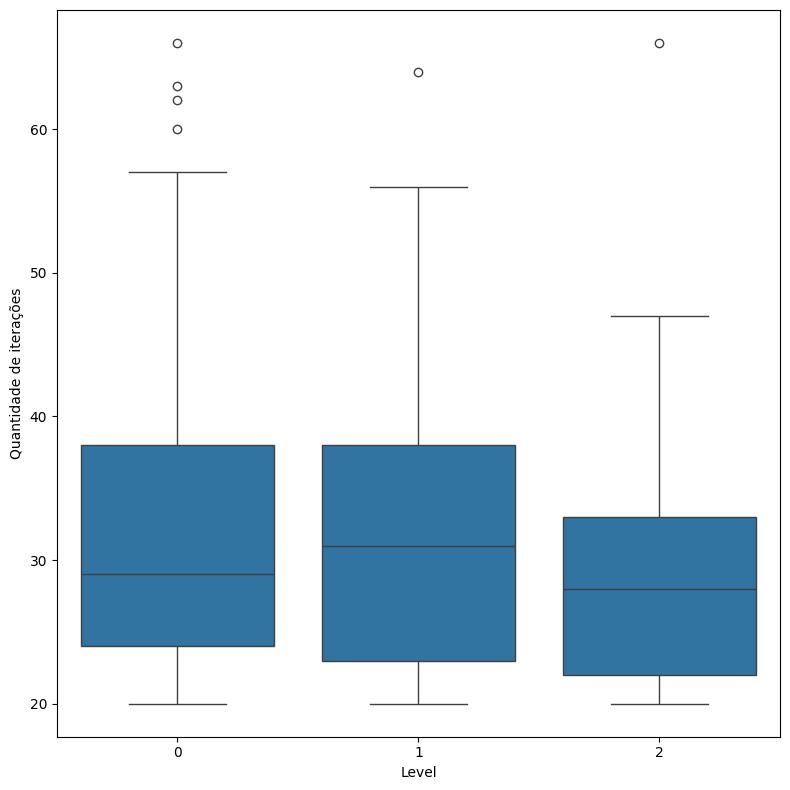

In [32]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='level', y='iterations', data=runs_and_generated_rooms, dodge=True)
plt.xlabel(f'Level')
plt.ylabel(f'Quantidade de iterações')
plt.tight_layout()

plt.savefig(f'{folder_path}/iterations_per_level.png', dpi=96, bbox_inches='tight')
plt.show()

#### Tudo em um plot só

In [13]:
quartis_por_nivel = runs_and_generated_rooms['iterations'].describe()
print(quartis_por_nivel)

count    303.000000
mean      31.722772
std       10.157161
min       20.000000
25%       24.000000
50%       30.000000
75%       38.000000
max       66.000000
Name: iterations, dtype: float64


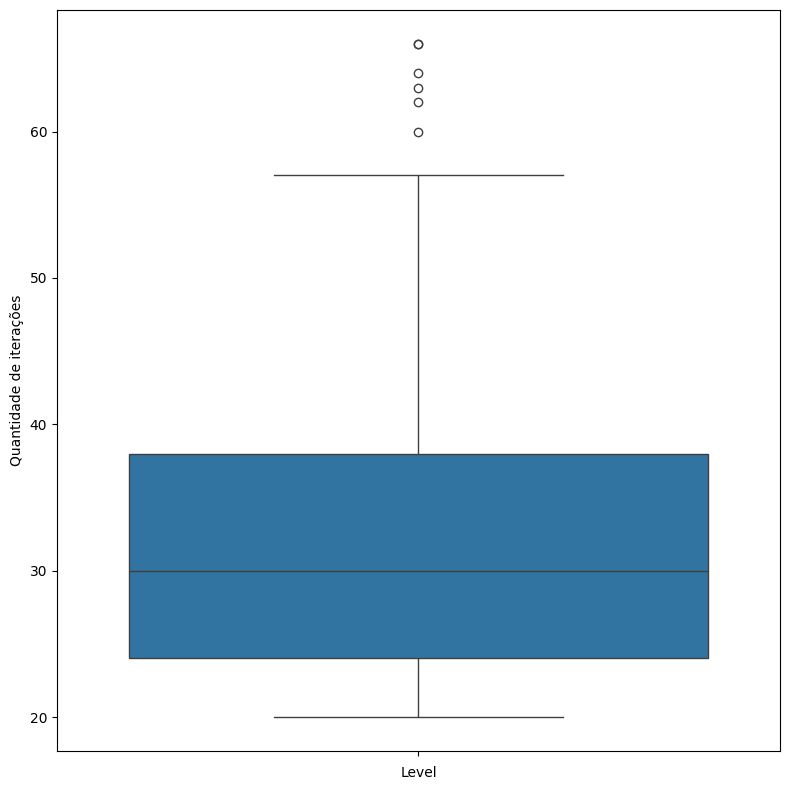

In [14]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=runs_and_generated_rooms['iterations'])
plt.xlabel(f'Level')
plt.ylabel(f'Quantidade de iterações')
plt.tight_layout()

plt.savefig(f'{folder_path}/iterations.png', dpi=96, bbox_inches='tight')

plt.show()

## Qualidade da geração das salas

### Um plot por nível

In [15]:
quartis_por_nivel = runs_and_generated_rooms.groupby('level')['percent'].describe()
print(quartis_por_nivel)

       count      mean       std       min       25%       50%     75%  max
level                                                                      
0      154.0  0.799413  0.127263  0.390000  0.737000  0.816667  0.8830  1.0
1      116.0  0.808022  0.140355  0.422500  0.745833  0.841250  0.9115  1.0
2       33.0  0.857343  0.107615  0.563333  0.802500  0.877500  0.9275  1.0


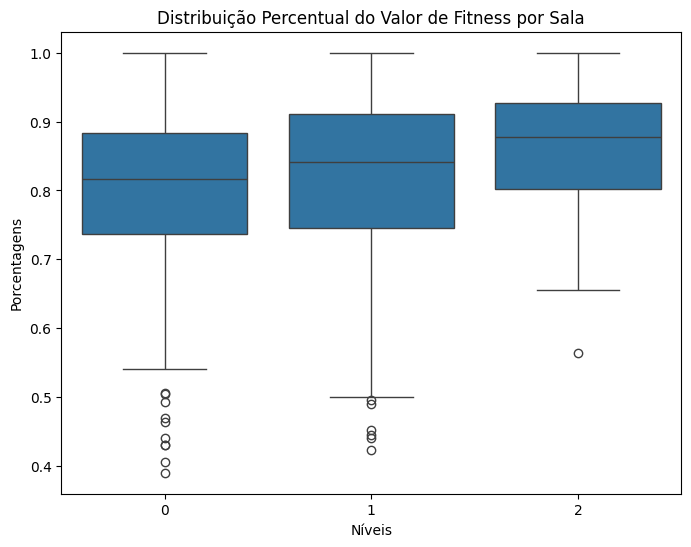

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='level', y='percent', data=runs_and_generated_rooms, dodge=True)
plt.xlabel('Níveis')
plt.ylabel('Porcentagens')
plt.title('Distribuição Percentual do Valor de Fitness por Sala')

plt.savefig(f'{folder_path}/fitness_per_level.png', dpi=96, bbox_inches='tight')
plt.show()

### Tudo em um plot só

In [17]:
quartis_por_nivel = runs_and_generated_rooms['percent'].describe()
print(quartis_por_nivel)

count    303.000000
mean       0.809018
std        0.131287
min        0.390000
25%        0.751000
50%        0.836000
75%        0.900000
max        1.000000
Name: percent, dtype: float64


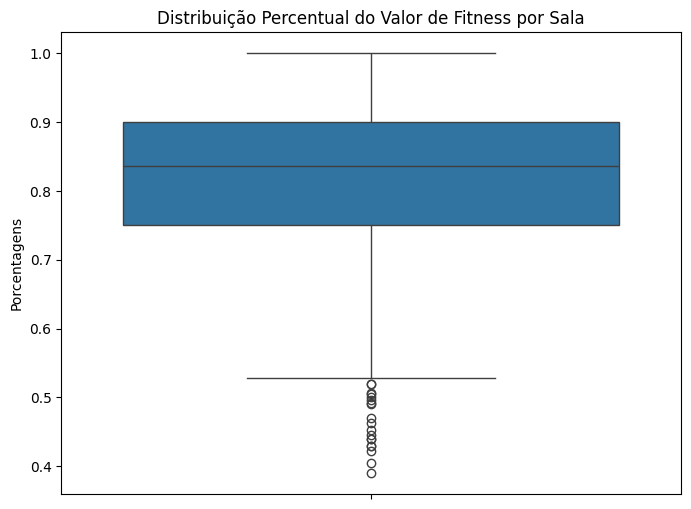

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=runs_and_generated_rooms['percent'])
plt.ylabel('Porcentagens')
plt.title('Distribuição Percentual do Valor de Fitness por Sala')

plt.savefig(f'{folder_path}/fitness.png', dpi=96, bbox_inches='tight')
plt.show()

# Qualidade dos níveis ao longo das iterações

Pergunta de pesquisa: "O número de iterações do algoritmo genético afeta a qualidade dos níveis gerados?"

Pergunta de pesquisa: "Existe uma correlação entre o número de iterações do algoritmo genético e o valor de fitness das salas geradas?"

## Utilizando Scatter Plot com Linha de Tendência

### Um plot por nível

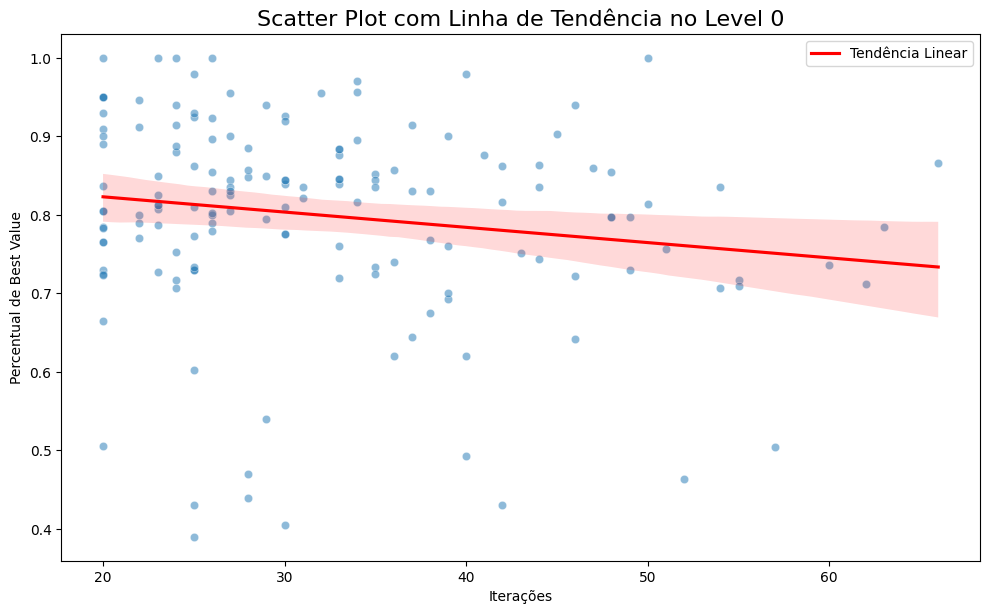

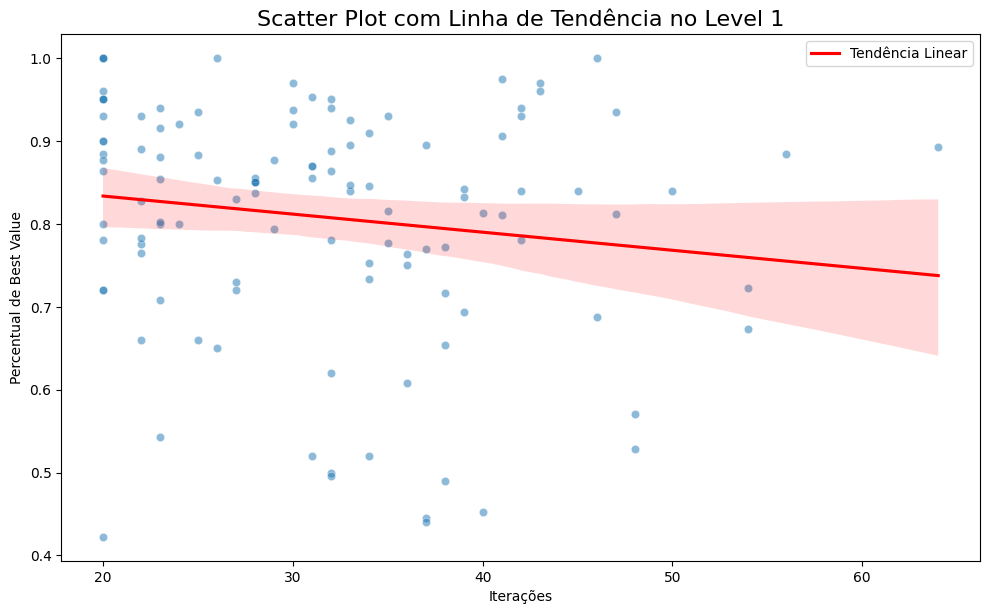

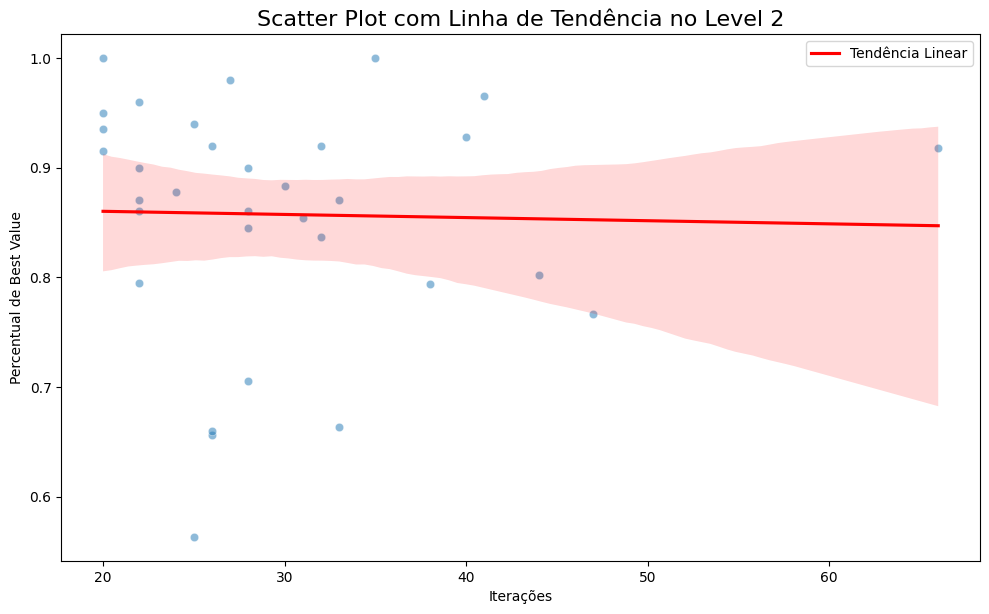

In [19]:
def plot_iterations_scatter(df, level=None):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='iterations', y='percent', data=df, alpha=0.5)
    sns.regplot(x='iterations', y='percent', data=df, scatter=False, color='red', label='Tendência Linear')
    plt.xlabel('Iterações')
    plt.ylabel('Percentual de Best Value')
    plt.legend()
    plt.tight_layout()
    
    if level is not None:
        plt.title(f'Scatter Plot com Linha de Tendência no Level {level}', fontsize=16)
        plt.savefig(f'{folder_path}/iterations_x_fitness_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title(f'Scatter Plot com Linha de Tendência', fontsize=16)
        plt.savefig(f'{folder_path}/iterations_x_fitness.png', dpi=96, bbox_inches='tight')

    plt.show()

plot_for_each_level(runs_and_generated_rooms, plot_iterations_scatter)

### Tudo em um plot só

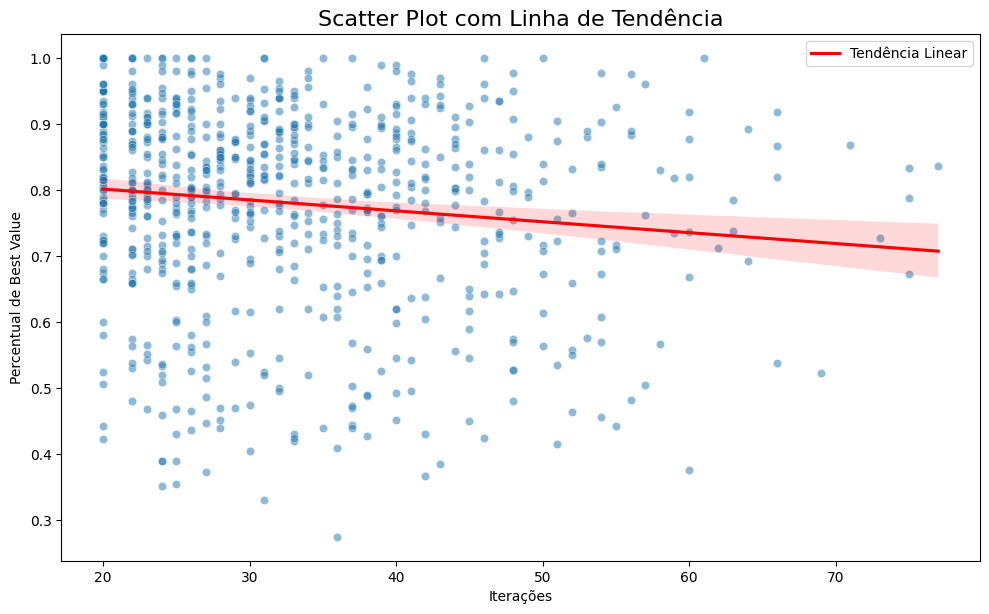

In [20]:
plot_iterations_scatter(generated_rooms)

### Resultado: linha descendente, quanto mais iterações levou, piores foram as soluções

## Correlação

In [21]:
runs_and_generated_rooms['iterations_normalized'] = (runs_and_generated_rooms['iterations'] - runs_and_generated_rooms['iterations'].min()) / (runs_and_generated_rooms['iterations'].max() - runs_and_generated_rooms['iterations'].min())

### Um plot para cada nível

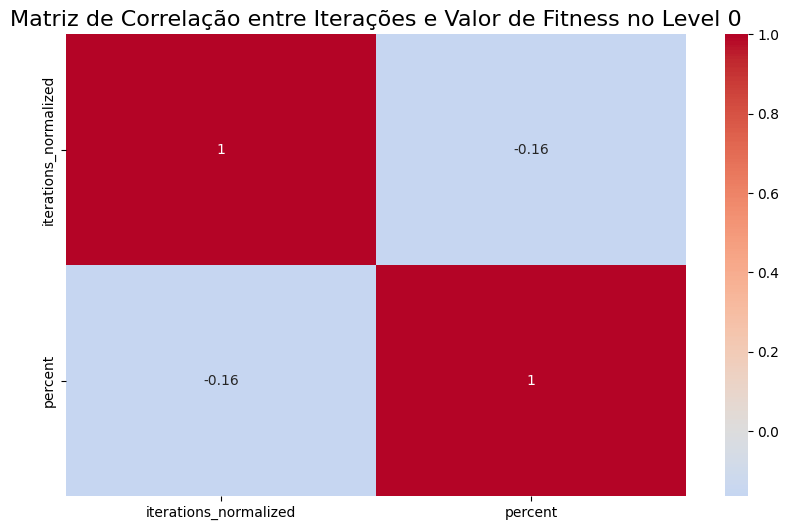

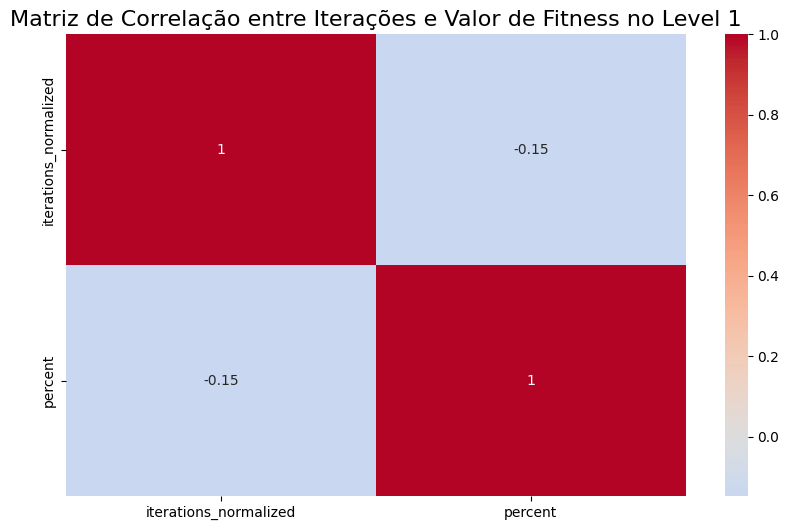

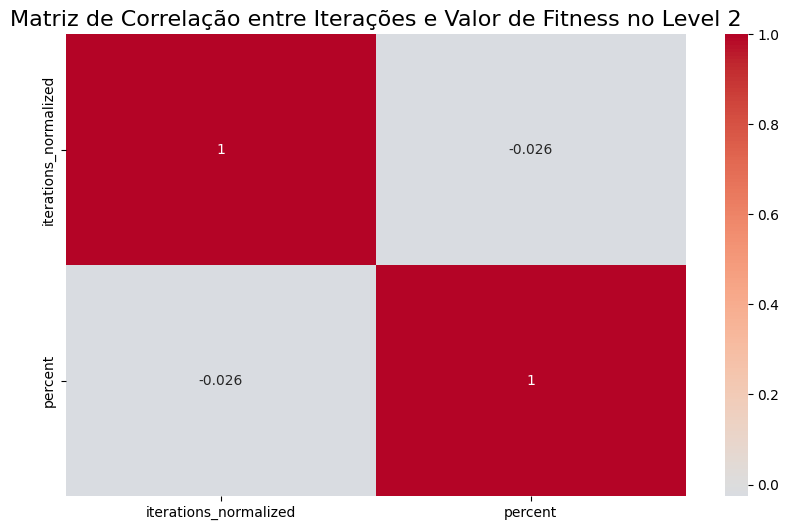

In [22]:
def plot_iterations_fitness_corr(df, level=None):
    correlation = df[['iterations_normalized', 'percent']].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    if level is not None:
        plt.title(f"Matriz de Correlação entre Iterações e Valor de Fitness no Level {level}", fontsize=16)
        plt.savefig(f'{folder_path}/iterations_fitness_correlation_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title("Matriz de Correlação entre Iterações e Valor de Fitness", fontsize=16)
        plt.savefig(f'{folder_path}/iterations_fitness_correlation.png', dpi=96, bbox_inches='tight')
    
    plt.show()

plot_for_each_level(runs_and_generated_rooms, plot_iterations_fitness_corr)

### Todos os níveis em um plot

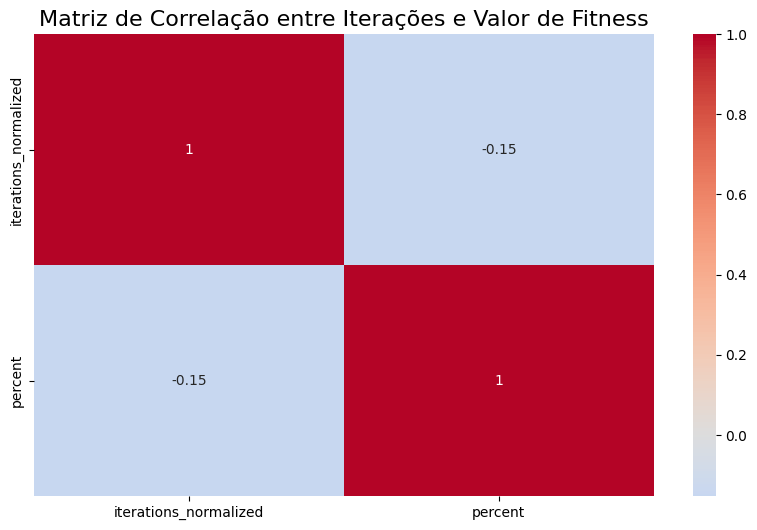

In [23]:
plot_iterations_fitness_corr(runs_and_generated_rooms)

### Conclusões

A correlação negativa fraca sugere que o número de iterações tem algum impacto sobre o valor de fitness, mas esse impacto é pequeno. Ou seja, mais iterações não necessariamente o fitness terá maior valor, e em alguns casos podem até estar associadas a uma ligeira piora.

# Qualidade dos níveis ao longo do tempo

Pergunta de pesquisa: "Qual é o impacto do tempo de geração no valor de fitness da sala?"

Pergunta de pesquisa: "Há uma relação entre o tempo de execução do algoritmo genético e a qualidade dos níveis gerados?"

## Utilizando Scatter Plot com Linha de Tendência

### Um plot para cada nível

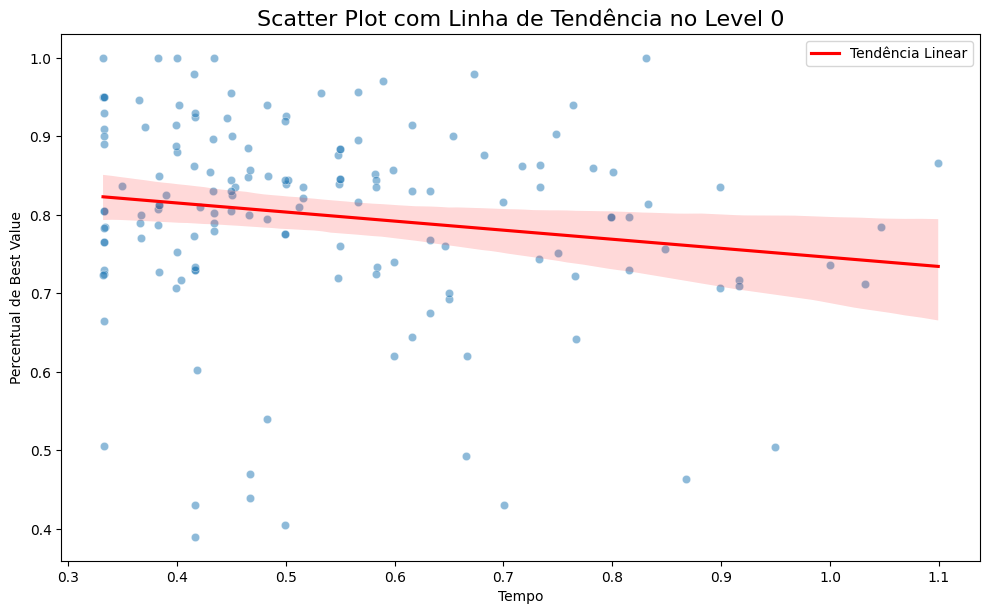

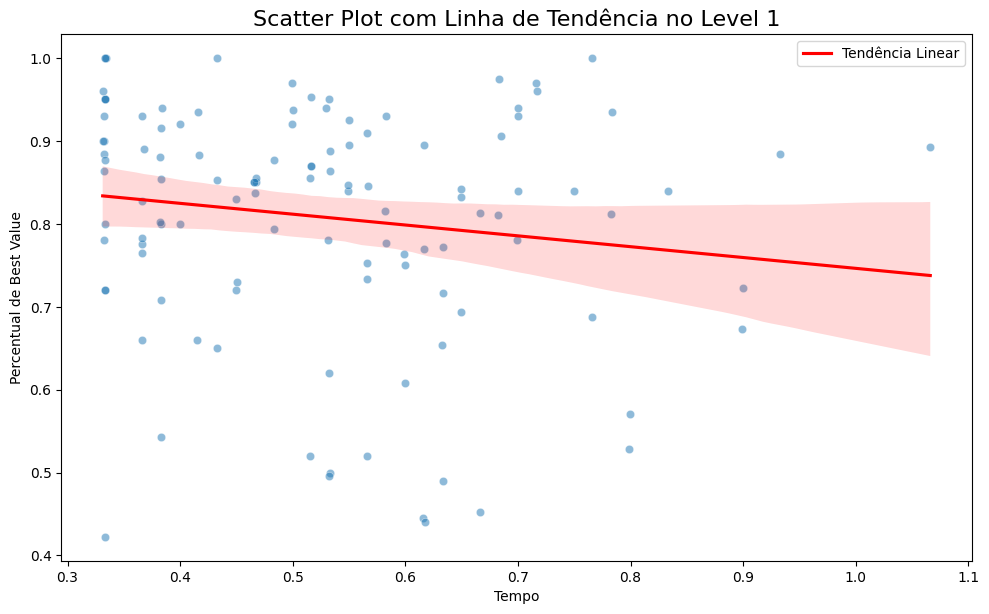

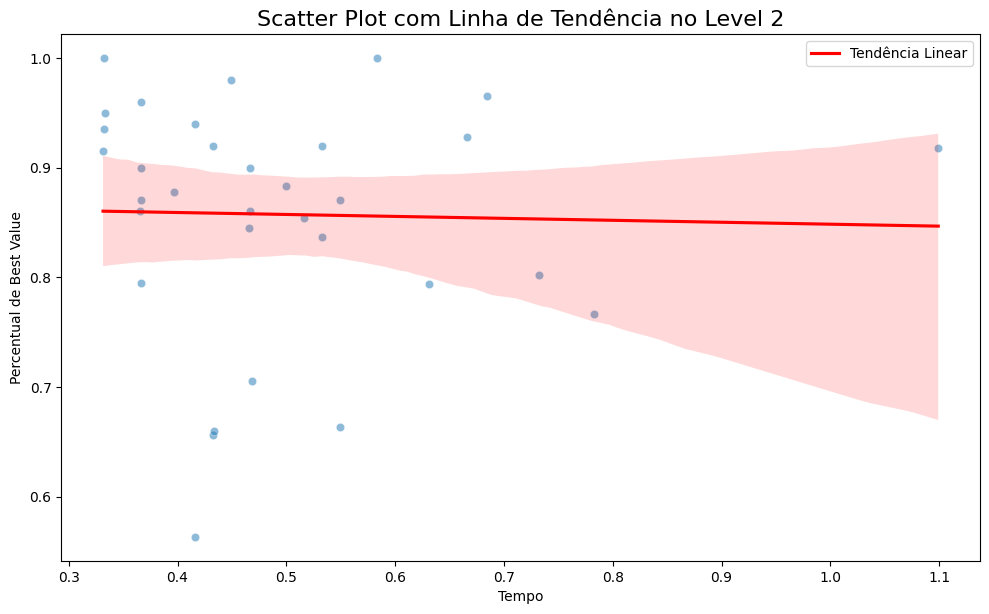

In [24]:
def plot_iterations_scatter(df, level=None):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='time_y', y='percent', data=df, alpha=0.5)
    sns.regplot(x='time_y', y='percent', data=df, scatter=False, color='red', label='Tendência Linear')
    plt.xlabel('Tempo')
    plt.ylabel('Percentual de Best Value')
    plt.legend()
    plt.tight_layout()

    if level is not None:
        plt.title(f'Scatter Plot com Linha de Tendência no Level {level}', fontsize=16)
        plt.savefig(f'{folder_path}/time_x_fitness_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Scatter Plot com Linha de Tendência', fontsize=16)
        plt.savefig(f'{folder_path}/time_x_fitness.png', dpi=96, bbox_inches='tight')

    plt.show()

plot_for_each_level(runs_and_generated_rooms, plot_iterations_scatter)

### Tudo em um plot só

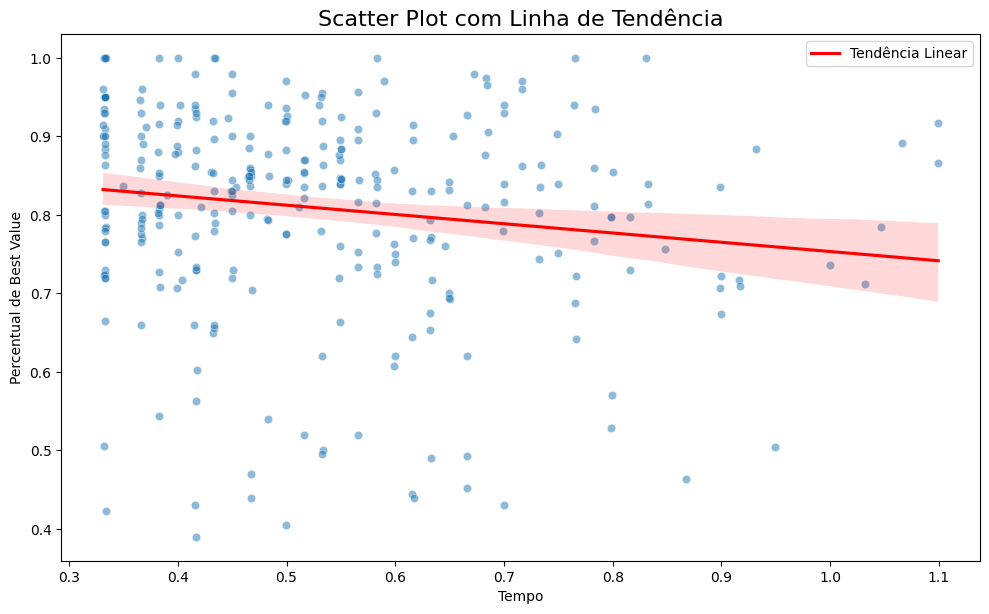

In [25]:
plot_iterations_scatter(runs_and_generated_rooms)

### Resultado: linha descendente, quanto mais tempo levou, piores foram as soluções

## Correlação

In [26]:
runs_and_generated_rooms['time_normalized'] = (runs_and_generated_rooms['time_y'] - runs_and_generated_rooms['time_y'].min()) / (runs_and_generated_rooms['time_y'].max() - runs_and_generated_rooms['time_y'].min())

### Um plot para cada nível

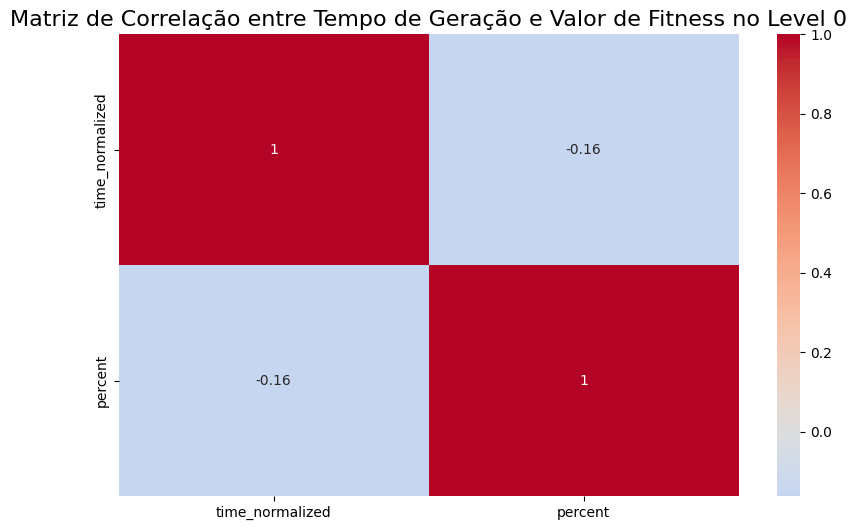

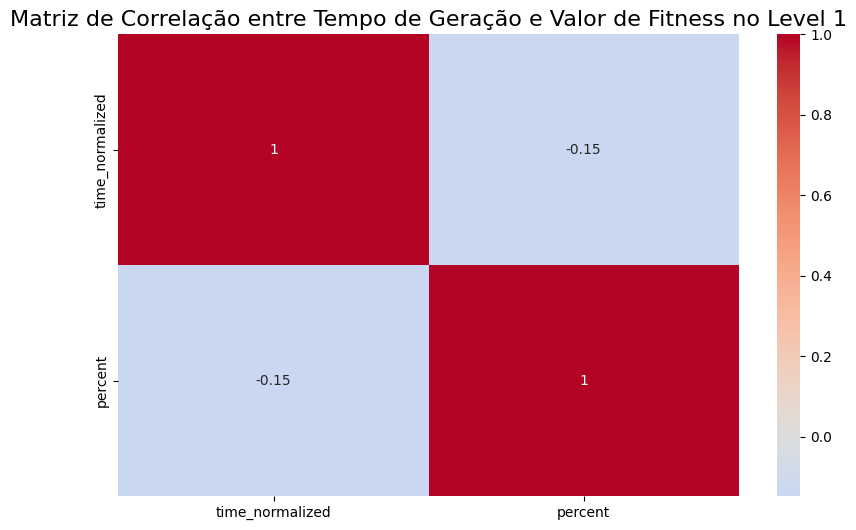

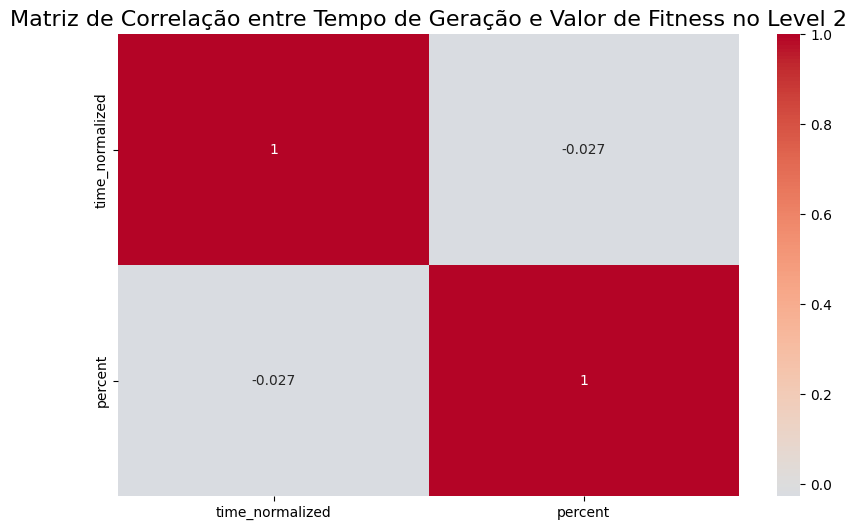

In [27]:
def plot_time_fitness_corr(df, level=None):
    correlation = df[['time_normalized', 'percent']].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)

    if level is not None:
        plt.title(f"Matriz de Correlação entre Tempo de Geração e Valor de Fitness no Level {level}", fontsize=16)
        plt.savefig(f'{folder_path}/time_fitness_correlation_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title("Matriz de Correlação entre Tempo de Geração e Valor de Fitness", fontsize=16)
        plt.savefig(f'{folder_path}/time_fitness_correlation.png', dpi=96, bbox_inches='tight')
    
    plt.show()

plot_for_each_level(runs_and_generated_rooms, plot_time_fitness_corr)

### Em um plot só

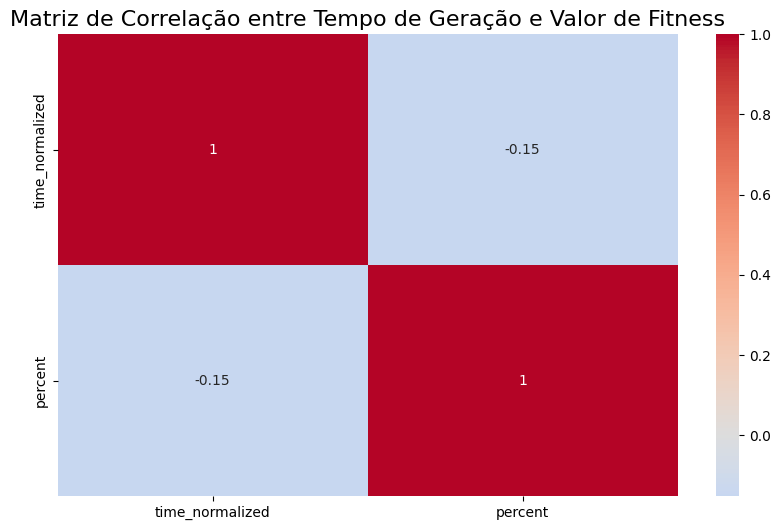

In [28]:
plot_time_fitness_corr(runs_and_generated_rooms)

# Pergunta de pesquisa: "A dificuldade da sala influencia o número de gerações necessárias ou o fitness?

## Barplot

                    mean_iterations  mean_percent
difficulty_rounded                               
0.20                      31.800000      0.826800
0.25                      29.850000      0.889542
0.33                      30.135135      0.844691
0.40                      29.200000      0.885000
0.50                      30.670103      0.829464
0.60                      35.000000      0.845000
0.67                      33.960784      0.788216
0.75                      28.000000      0.702909
0.80                      42.000000      0.846250
1.00                      36.416667      0.680667


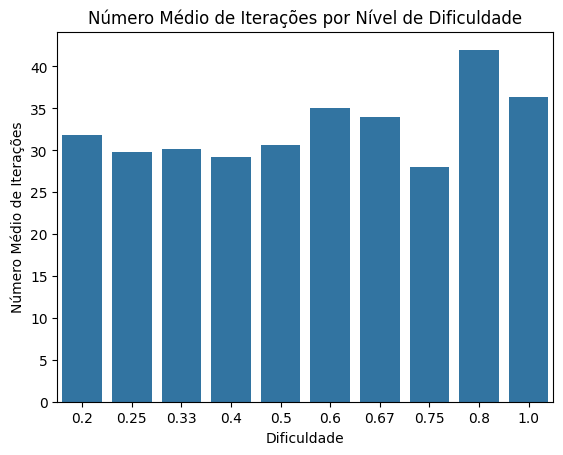

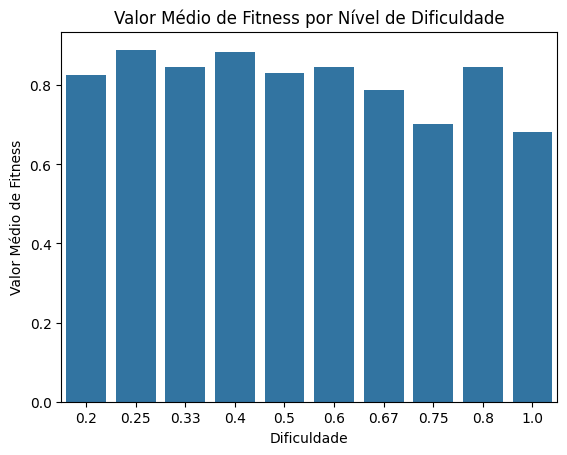

In [ ]:
grouped = runs_and_generated_rooms.groupby("difficulty_rounded")
results = grouped.agg({"iterations": ["mean", "std"], "percent": ["mean", "std"]})

results.columns = ["mean_iterations", "std_iterations", "mean_percent", "std_percent"]
print(results[['mean_iterations', 'mean_percent']])

sns.barplot(x=results.index, y="mean_iterations", data=results)
plt.xlabel("Dificuldade")
plt.ylabel("Número Médio de Iterações")
plt.title("Número Médio de Iterações por Nível de Dificuldade")
plt.show()

sns.barplot(x=results.index, y="mean_percent", data=results)
plt.xlabel("Dificuldade")
plt.ylabel("Valor Médio de Fitness")
plt.title("Valor Médio de Fitness por Nível de Dificuldade")
plt.show()

## Correlação

### Um plot por nível

            difficulty  iterations   percent
difficulty    1.000000    0.214323 -0.703871
iterations    0.214323    1.000000 -0.163779
percent      -0.703871   -0.163779  1.000000


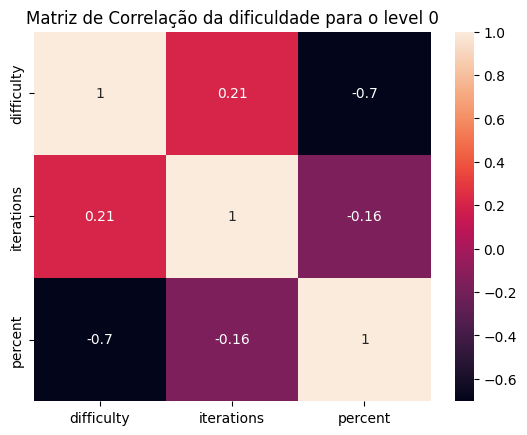

            difficulty  iterations   percent
difficulty    1.000000    0.142185 -0.676873
iterations    0.142185    1.000000 -0.147874
percent      -0.676873   -0.147874  1.000000


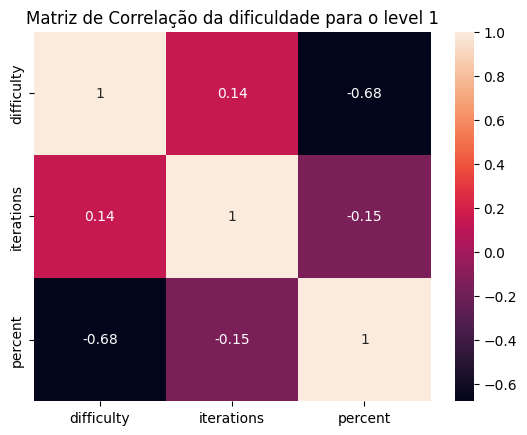

            difficulty  iterations   percent
difficulty    1.000000   -0.074371 -0.803092
iterations   -0.074371    1.000000 -0.025710
percent      -0.803092   -0.025710  1.000000


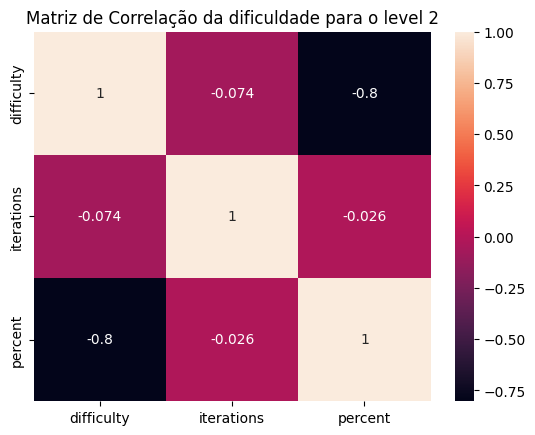

In [30]:
def plot_difficulty_correlation(df, level=None):
    correlation_matrix = df[['difficulty', 'iterations', 'percent']].corr()
    print(correlation_matrix)

    sns.heatmap(correlation_matrix, annot=True)

    if level is not None:
        plt.title(f"Matriz de Correlação da dificuldade para o level {level}")
    else:
        plt.title("Matriz de Correlação da dificuldade")

    plt.show()

plot_for_each_level(runs_and_generated_rooms, plot_difficulty_correlation)

### Um plot só

            difficulty  iterations   percent
difficulty    1.000000    0.164870 -0.704527
iterations    0.164870    1.000000 -0.152766
percent      -0.704527   -0.152766  1.000000


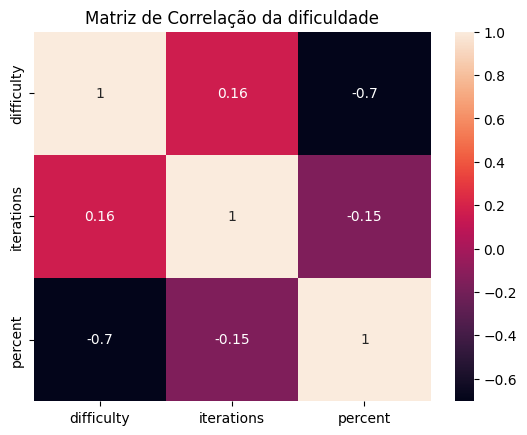

In [31]:
plot_difficulty_correlation(runs_and_generated_rooms)

## Conclusões

**Considerações Finais**

Tendências de Dificuldade: À medida que os níveis de dificuldade aumentam (do Nível 0 ao Nível 2), a correlação negativa entre dificuldade e fitness se torna mais forte, enquanto a correlação entre dificuldade e iterações diminui.

Impacto no Design: A análise sugere que aumentar a dificuldade em níveis mais elevados pode levar a um impacto negativo significativo na qualidade das salas geradas. Portanto, pode ser interessante investigar como os parâmetros do algoritmo genético podem ser ajustados para melhorar o fitness em salas de maior dificuldade.